In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from util import *
%matplotlib inline

In [23]:
wine_data = pd.read_csv('data/train.csv')

In [24]:
wine_data = wine_data[pd.notnull(wine_data['description'])]
wine_data = wine_data[pd.notnull(wine_data['variety'])]


In [25]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174999 entries, 0 to 174999
Data columns (total 14 columns):
country                  174952 non-null object
description              174999 non-null object
designation              122734 non-null object
points                   174999 non-null float64
price                    174999 non-null float64
province                 174952 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82188 non-null object
variety                  174999 non-null object
winery                   174999 non-null object
id                       174999 non-null int64
dtypes: float64(2), int64(1), object(11)
memory usage: 20.0+ MB


In [26]:
wine_data['num_description'] = extract_text(wine_data['description'])
wine_data['variety'] = extract_text(wine_data['variety'])

In [27]:
wine_data.tail(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id,num_description
174997,Spain,"Clean and toasty, with mineral and the slighte...",Cordon Negro Brut,85.030109,10.0,Catalonia,Cava,NaN,NaN,NaN,NaN,0.000013,Freixenet,142217,0.002682
174998,US,"A lovely Pinot Noir, showing flamboyantly ripe...",Estate Grown,90.867770,65.0,California,Russian River Valley,Sonoma,NaN,NaN,NaN,0.007310,Donum,64741,0.002756
174999,US,"Made to benefit the exploratory organization, ...",National Geographic Ocean Reserve Blanc de Blancs,91.881217,50.0,California,Green Valley,Sonoma,Virginie Boone,@vboone,Iron Horse 2013 National Geographic Ocean Rese...,0.000013,Iron Horse,91621,0.001521


In [28]:
# xx = wine_data[['country','price']]
# xx = xx.groupby(['country'])['price'].mean().reset_index()
    
# def get_average(country,xx):
#     if len(xx.loc[xx['country'] == country, 'price'].values) > 0:
#         value =  xx.loc[xx['country'] == country, 'price'].values[0]
#     else:
#         return 0
    
#     if value > 32:
#         return 2
#     elif value > 25:
#         return 1
#     else:
#         return 0
    
# get_average('Portugal',xx)

In [29]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174999 entries, 0 to 174999
Data columns (total 15 columns):
country                  174952 non-null object
description              174999 non-null object
designation              122734 non-null object
points                   174999 non-null float64
price                    174999 non-null float64
province                 174952 non-null object
region_1                 146466 non-null object
region_2                 75394 non-null object
taster_name              65509 non-null object
taster_twitter_handle    62190 non-null object
title                    82188 non-null object
variety                  174999 non-null float64
winery                   174999 non-null object
id                       174999 non-null int64
num_description          174999 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 21.4+ MB


In [30]:
# country_dummies = pd.get_dummies(wine_data.country)
# wine_data.drop(['country'],axis=1,inplace=True)
# wine_data = pd.concat([wine_data,country_dummies],axis='columns')
# wine_data.points.describe()

In [31]:
# wine_data['title'] = wine_data.title.fillna('No title ')
# # wine_data['country'] = wine_data.country.fillna('No Country')
# wine_data['province'] = wine_data.province.fillna('No province')
# wine_data['designation'] = wine_data.designation.fillna('No designation')
# wine_data['title'] = wine_data.title.fillna('No title')
# wine_data['winery'] = wine_data.winery.fillna('No winery')

In [32]:
# # countries = list(wine_data['country'].unique())
# province = list(wine_data['province'].unique())
# variety = list(wine_data['variety'].unique())
# designation = list(wine_data['designation'].unique())
# titles = list(wine_data['title'].unique())
# winery = list(wine_data['winery'].unique())

In [33]:
wine_data['Sentiment'] = wine_data['description'].apply(lambda x: sentiment_analyzer_scores(x))

# # wine_data['country_code'] = wine_data['country'].apply(lambda x: get_country_num(x,countries))

# wine_data['province_code'] = wine_data['province'].apply(lambda x: get_province(x,province))

# wine_data['variety_code'] = wine_data['variety'].apply(lambda x: get_variety(x,variety))

# wine_data['designation_code'] = wine_data['designation'].apply(lambda x: get_designation(x,designation))

# wine_data['winery'] = wine_data['winery'].apply(lambda x: get_winery(x,winery))

# wine_data['year_code'] = wine_data['title'].apply(lambda x: get_year(x))

wine_data['point_cat'] = wine_data['points'].apply(lambda x:get_points(x))

In [34]:
wine_data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'id', 'num_description', 'Sentiment', 'point_cat'],
      dtype='object')

In [35]:
# sns.pairplot(wine_data)

In [36]:
# wine_data['year_code'] = wine_data.year_code.fillna(int(wine_data.year_code.mean()))
# wine_data.head(2)

In [37]:
wine_data.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'id', 'num_description', 'Sentiment', 'point_cat'],
      dtype='object')

In [42]:
filtered_data = wine_data[['variety', 'id', 'num_description', 'Sentiment', 'point_cat','price']]

filtered_data.head(3)

# filtered_data['year_code'] = filtered_data['year_code'].apply(lambda x:int(x))

# filtered_data.head(2)

,variety,id,num_description,Sentiment,point_cat,price
0,0.000016,32027,0.002999,0.8271,3,20.0
1,0.000027,71079,0.003312,0.8591,3,28.0
2,0.000027,32440,0.003188,0.8555,4,130.0


In [43]:
# filtered_data.year_code.describe()

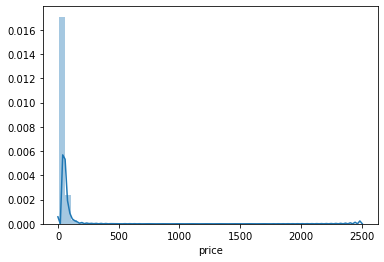

In [44]:
sns.distplot(filtered_data['price'])

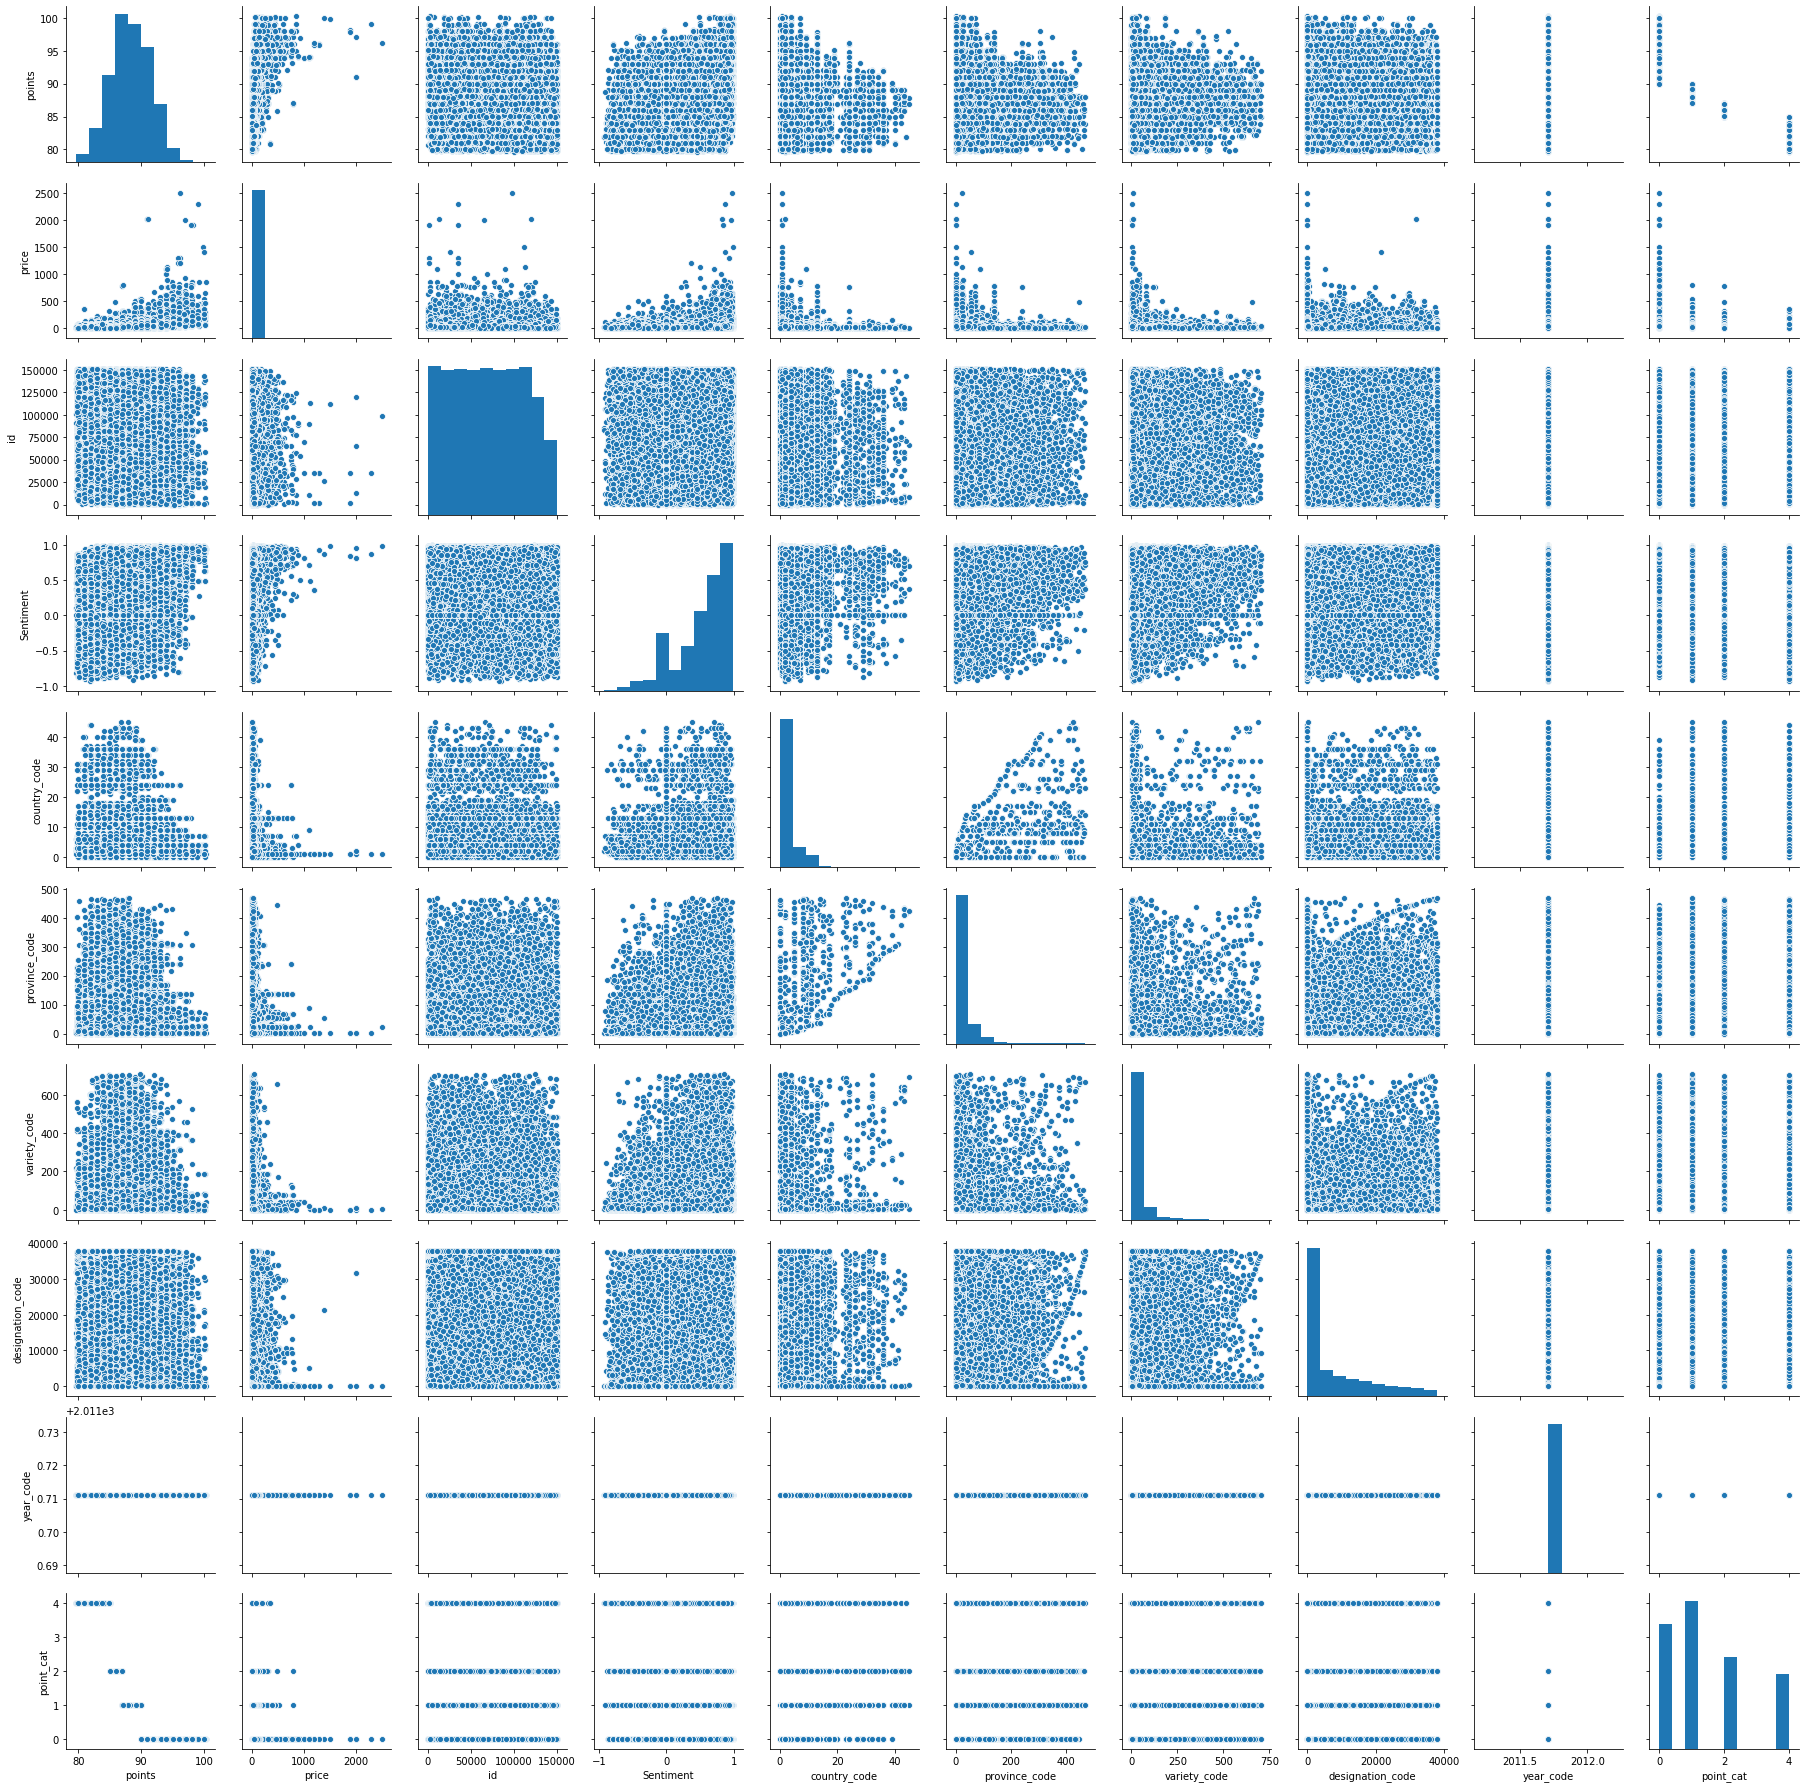

In [20]:
sns.pairplot(filtered_data)

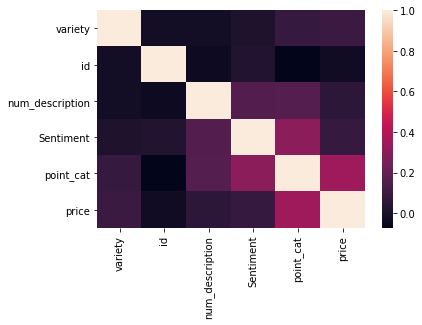

In [45]:
sns.heatmap(filtered_data.corr())

In [46]:
filtered_data.columns

Index(['variety', 'id', 'num_description', 'Sentiment', 'point_cat', 'price'], dtype='object')

In [52]:
X = filtered_data[['variety', 'num_description', 'Sentiment', 'point_cat']]
y = filtered_data['price']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(lm.intercept_)

-0.8486360243299274


In [56]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
variety,1217.798049
num_description,255.819748
Sentiment,-3.041918
point_cat,12.807800


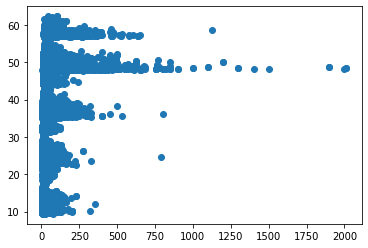

In [57]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

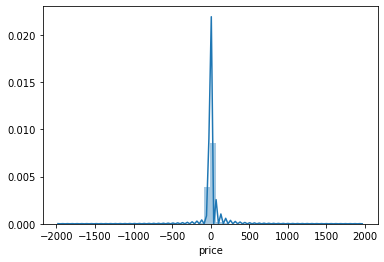

In [26]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

1.RMSE: 35.80955828292229

## Generate Test Resullts

In [38]:
test_data = pd.read_csv('data/test.csv')



In [ ]:
test_data.head(2)

In [35]:
test_data['description'] = extract_text(test_data['description'])
test_data['variety'] = extract_text(test_data['variety'])
test_data['point_cat'] = test_data['points'].apply(lambda x:get_points(x))

In [36]:
x_holdout = test_data[['description','variety','point_cat','price']]
y_holdout = test_data['price']

In [37]:
predictions = lm.predict(x_holdout)
predictions

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').